ПИ19-3 Деменчук Георгий. Практика 4<br>

# 4. Сверточные нейронные сети.

__Автор__: Никита Владимирович Блохин (NVBlokhin@fa.ru)

Финансовый университет, 2020 г. 

## 1. Классификация предметов одежды (датасет Fashion MNIST)



### 1.1 Решить задачу классификации, не используя сверточные слои. 
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [106]:
import numpy as np
import torch
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
from torch import nn
from torch import optim
import torch.nn.functional as F
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm
import torchvision

%matplotlib inline

In [2]:
MNIST_train = torchvision.datasets.FashionMNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.FashionMNIST('./', download=True, train=False)

In [3]:
MNIST_train.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [4]:
X_train = MNIST_train.data.float()
y_train = MNIST_train.targets
X_test = MNIST_test.data.float()
y_test = MNIST_test.targets

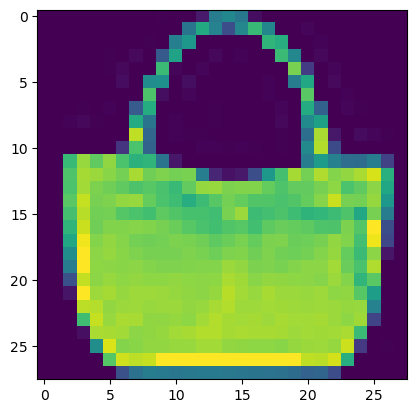

label - Bag


In [5]:
plt.imshow(X_train[100, :, :])
plt.show()
print('label -', MNIST_train.classes[y_train[100]])

Т.к. мы не используем свёрточные сети, то придётся сразу превратить матрицу 28х28 пикселей в вектор

In [6]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28])

In [7]:
len(MNIST_train.classes)

10

In [8]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons, n_classes):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, n_classes) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(56, 10)

In [9]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-4)

In [10]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test
y_test = y_test

for epoch in range(20):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        print(X_batch.shape)
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
tensor(0.8443)
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 78

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
tensor(0.8456)
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 78

torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size([100, 784])
torch.Size(

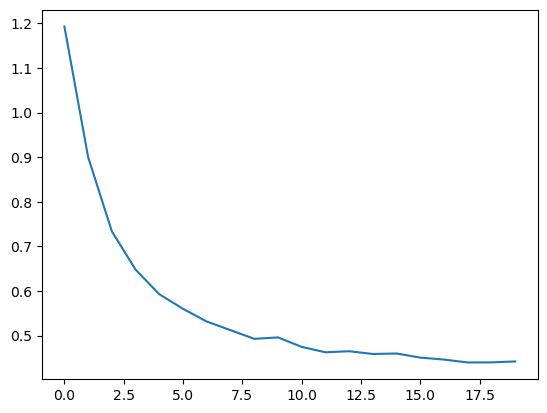

In [11]:
with torch.no_grad():
    plt.plot(test_loss_history)
    plt.show()

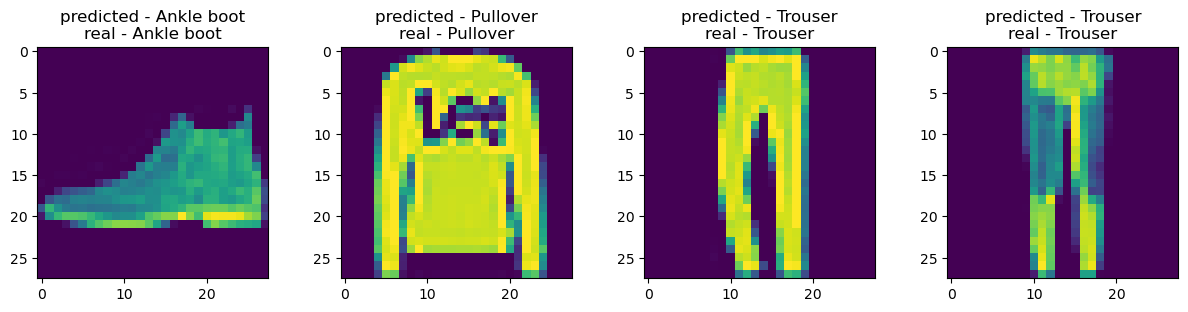

In [12]:
def show_sample(model, X, y, dataset):
    y_pred = model.forward(X)
    fig, ax = plt.subplots(1, 4, figsize=(15, 3))
    for i in range(4):
        ax[i].imshow(X[i].reshape(28, 28))
        ax[i].set_title(f'predicted - {dataset.classes[y_pred[i].argmax()]}\nreal - {dataset.classes[y[i]]}')
    
show_sample(mnist_net, X_test, y_test, MNIST_test)

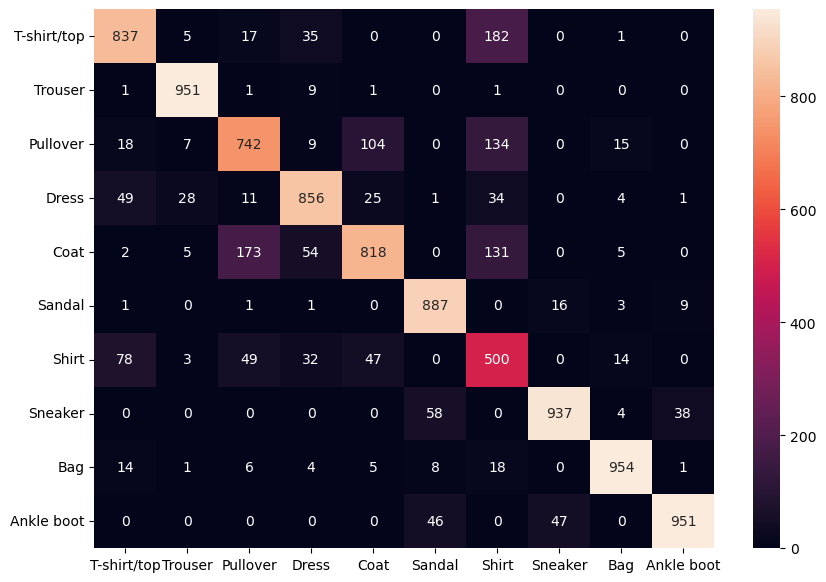

In [13]:
def show_matrix(model, X, y, dataset):
    heat_map_matrix = torch.zeros((len(dataset.classes), len(dataset.classes)))
    y_pred = model.forward(X).argmax(axis=1)
    for i in range(len(y)):
        heat_map_matrix[y_pred[i], y[i]] += 1
    heat_map_matrix = pd.DataFrame(heat_map_matrix, columns=dataset.classes)
    heat_map_matrix.index = dataset.classes
    
    plt.figure(1, (10, 7))
    sns.heatmap(heat_map_matrix, annot=True, fmt='g')
    plt.show()

show_matrix(mnist_net, X_test, y_test, MNIST_test)    

In [14]:
test_preds = mnist_net.forward(X_test)
accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
print(accuracy)

tensor(0.8433)


In [15]:
torch.save(mnist_net, 'model_1_1.pth')

### 1.2 Решить задачу 1.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 90%
* Визуализировать результаты работы первого сверточного слоя

In [16]:
X_train = MNIST_train.data.float()
y_train = MNIST_train.targets
X_test = MNIST_test.data.float()
y_test = MNIST_test.targets

X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [17]:
class MNIST_ConV(torch.nn.Module):
    def __init__(self):
        super(MNIST_ConV, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.Tanh()
        self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.Tanh()
        self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 80)
        self.act3  = torch.nn.Tanh()
        
        self.fc2   = torch.nn.Linear(80, 40)
        self.act4  = torch.nn.Tanh()
        
        self.fc3   = torch.nn.Linear(40, 10)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
mnist_conv = MNIST_ConV()

In [18]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_conv.parameters(), lr=1.0e-3)

In [19]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

for epoch in range(20):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes]
        y_batch = y_train[batch_indexes]
        
        preds = mnist_conv.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_conv.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test))
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.8455)
tensor(0.8689)
tensor(0.8831)
tensor(0.8869)
tensor(0.8899)
tensor(0.8932)
tensor(0.8925)
tensor(0.9017)
tensor(0.8959)
tensor(0.8979)
tensor(0.8979)
tensor(0.8998)
tensor(0.9020)
tensor(0.8984)
tensor(0.9096)
tensor(0.9055)
tensor(0.9043)
tensor(0.9075)
tensor(0.9006)
tensor(0.9063)


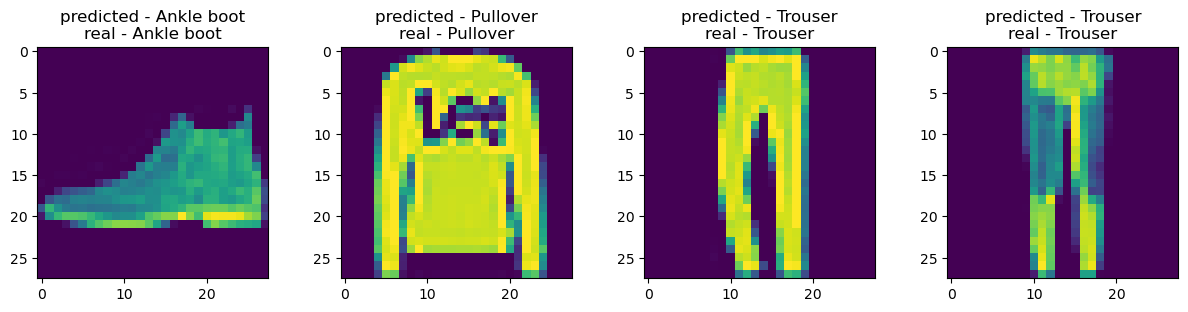

In [20]:
show_sample(mnist_conv, X_test, y_test, MNIST_test)

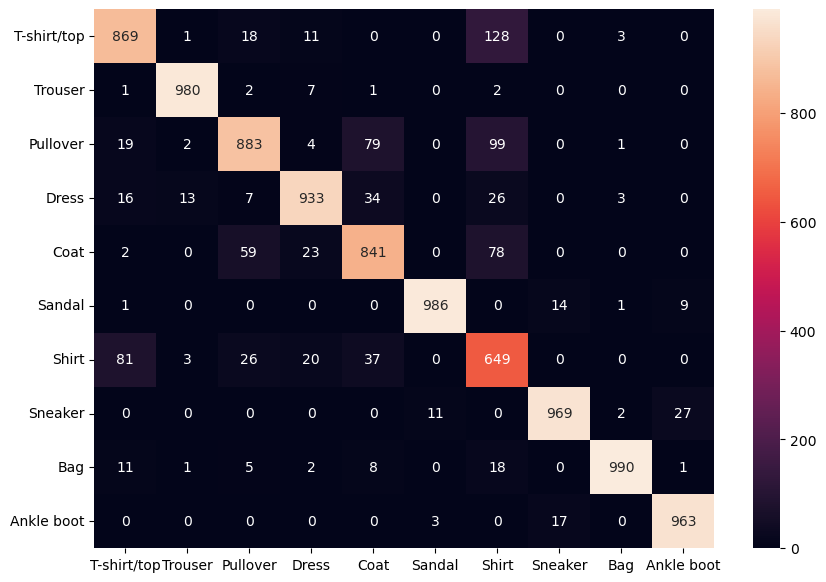

In [21]:
show_matrix(mnist_conv, X_test, y_test, MNIST_test)

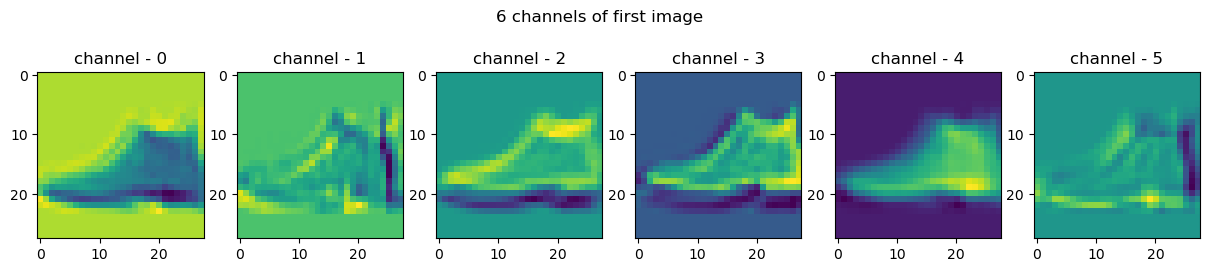

In [22]:
def show_first_conv(model, X, y, dataset):
    with torch.no_grad():
        first_conv = model.conv1(X)
        fig, ax = plt.subplots(1, first_conv[0].size(0), figsize=(15, 3))
        fig.suptitle(f'{first_conv[0].size(0)} channels of first image')
        for i in range(first_conv[0].size(0)):
            ax[i].imshow(first_conv[0][i])
            ax[i].set_title(f'channel - {i}')

show_first_conv(mnist_conv, X_test, y_test, MNIST_test)

##  2. Классификация изображений (датасет CIFAR 10) 


### 2.1 Решить задачу классификации, не используя сверточные слои. 

* Нормализовать данные (если необходимо)
* Предложить архитектуру модели для решения задачи
* Посчитать количество параметров модели.
* Обучить модель
* Вывести график функции потерь по эпохам. 
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
* Сохранить модель

In [30]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5), (0.5))])

trainset = datasets.CIFAR10('./', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = datasets.CIFAR10('./', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [33]:
def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax

def view_classify(img, ps, version="MNIST"):

    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    elif version == "CIFAR-10":
        ax2.set_yticklabels(["airplane",
                            "automobile",
                            "bird",
                            "cat",
                            "deer",
                            "dog",
                            "frog",
                            "horse",
                            "ship",
                            "truck",], size='small');
        
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

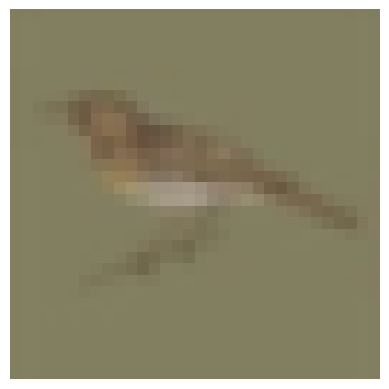

In [35]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [36]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(3*32*32, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = x.view(x.shape[0], -1)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)
        
        return x

In [37]:
model = Classifier()
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

In [38]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Количество параметров: {count_parameters(model)}') 

Количество параметров: 828490


In [39]:

epochs = 10
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0

        with torch.no_grad():
            for test_images, test_labels in testloader:
                test_images = test_images.view(test_images.shape[0], -1)
                logps = model(test_images)
                test_loss += criterion(logps, test_labels)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(train_losses[-1]),
              "Test loss: {:.3f}..".format(test_losses[-1]),
              "Test Accuracy: {:.3f}%".format(accuracy/len(testloader)))


Epoch 1/10.. Training loss: 1.708.. Test loss: 1.571.. Test Accuracy: 0.446%
Epoch 2/10.. Training loss: 1.531.. Test loss: 1.525.. Test Accuracy: 0.458%
Epoch 3/10.. Training loss: 1.443.. Test loss: 1.469.. Test Accuracy: 0.487%
Epoch 4/10.. Training loss: 1.378.. Test loss: 1.435.. Test Accuracy: 0.492%
Epoch 5/10.. Training loss: 1.328.. Test loss: 1.433.. Test Accuracy: 0.501%
Epoch 6/10.. Training loss: 1.279.. Test loss: 1.432.. Test Accuracy: 0.499%
Epoch 7/10.. Training loss: 1.233.. Test loss: 1.403.. Test Accuracy: 0.518%
Epoch 8/10.. Training loss: 1.194.. Test loss: 1.435.. Test Accuracy: 0.509%
Epoch 9/10.. Training loss: 1.154.. Test loss: 1.438.. Test Accuracy: 0.513%
Epoch 10/10.. Training loss: 1.126.. Test loss: 1.443.. Test Accuracy: 0.507%


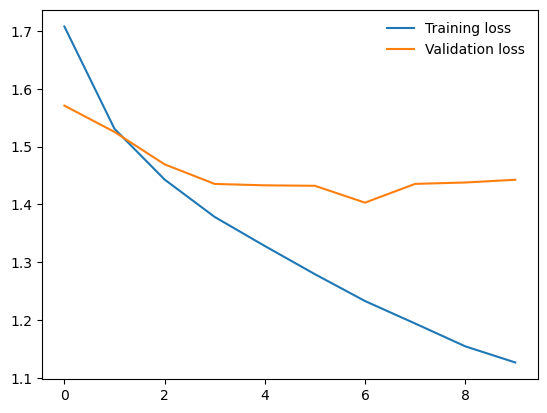

In [40]:
plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


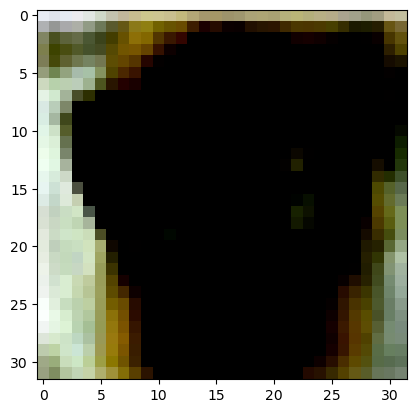

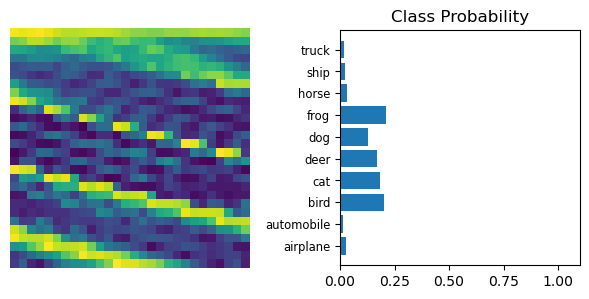

In [41]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.view(1, 3*32*32)

with torch.no_grad():
    output = model.forward(img)

ps = torch.exp(output)
plt.imshow(images[0].permute(1,2,0))
view_classify(images[0], ps, version='CIFAR-10')

In [42]:
test_loss = 0
accuracy = 0
predict = []
true_label = []

with torch.no_grad():
    for test_images, test_labels in testloader:
        test_images = test_images.view(test_images.shape[0], -1)
        logps = model(test_images)
        test_loss += criterion(logps, test_labels)
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        predict.append(top_class)
        true_label.append(test_labels.view(*top_class.shape))


In [43]:
torch.vstack(predict).flatten().shape,torch.vstack(true_label).flatten().shape

(torch.Size([10000]), torch.Size([10000]))

In [47]:

class_names = ["airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",]
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(torch.vstack(true_label).flatten().numpy(), torch.vstack(predict).flatten().numpy())


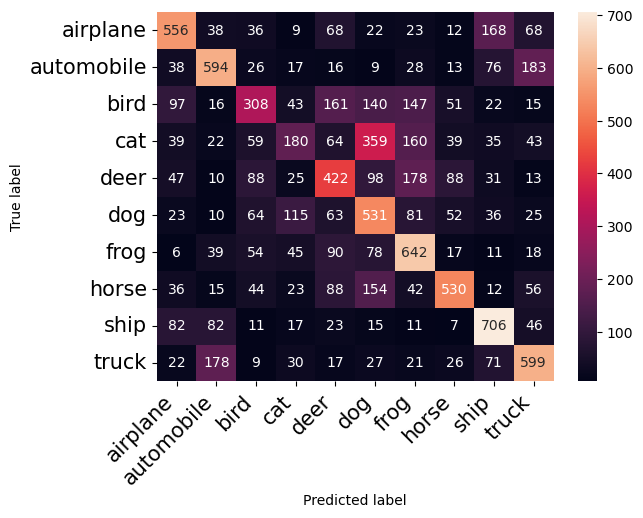

In [48]:
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label');


### 2.2 Решить задачу 2.1, используя сверточную нейронную сеть. 
* Добиться значения accuracy на тестовом множестве не менее 70%.
* Визуализировать результаты работы первого сверточного слоя

In [49]:
from torchvision import models

In [50]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        model = models.resnet18(pretrained=False)
        model.fc = nn.Linear(512, 10)
        self.model = model
    
    def forward(self, data):
        out = self.model(data.reshape((data.shape[0],3,32,32)))
        return out

In [51]:
model = Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.003)

/Users/demg/conda_env/env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/demg/conda_env/env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [52]:

def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'Количество параметров: {count_parameters(model)}') 

Количество параметров: 11181642


In [53]:
from tqdm.notebook import tqdm

In [54]:
epochs = 10
train_losses, test_losses = [], []

for e in range(epochs):
    running_loss = 0
    
    pbar = tqdm(trainloader)
    for images, labels in pbar:
        images = images.view(images.shape[0], -1)
        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for test_images, test_labels in testloader:
                test_images = test_images.view(test_images.shape[0], -1)
                logps = model(test_images)
                test_loss += criterion(logps, test_labels)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(train_losses[-1]),
              "Test loss: {:.3f}..".format(test_losses[-1]),
              "Test Accuracy: {:.3f}%".format(accuracy/len(testloader)))


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 1/10.. Training loss: 1.502.. Test loss: 1.227.. Test Accuracy: 0.569%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 2/10.. Training loss: 1.064.. Test loss: 0.989.. Test Accuracy: 0.658%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 3/10.. Training loss: 0.863.. Test loss: 0.874.. Test Accuracy: 0.702%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 4/10.. Training loss: 0.730.. Test loss: 0.790.. Test Accuracy: 0.731%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 5/10.. Training loss: 0.621.. Test loss: 0.735.. Test Accuracy: 0.753%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 6/10.. Training loss: 0.515.. Test loss: 0.751.. Test Accuracy: 0.751%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 7/10.. Training loss: 0.428.. Test loss: 0.788.. Test Accuracy: 0.756%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 8/10.. Training loss: 0.348.. Test loss: 0.771.. Test Accuracy: 0.763%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 9/10.. Training loss: 0.276.. Test loss: 0.882.. Test Accuracy: 0.758%


  0%|          | 0/782 [00:00<?, ?it/s]

Epoch 10/10.. Training loss: 0.215.. Test loss: 0.900.. Test Accuracy: 0.761%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


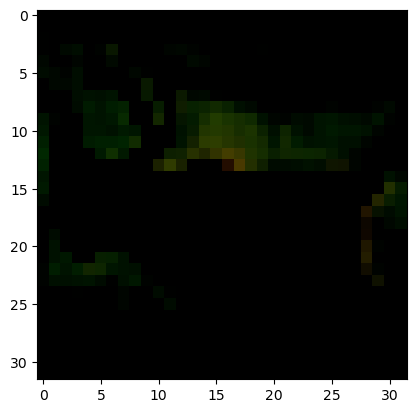

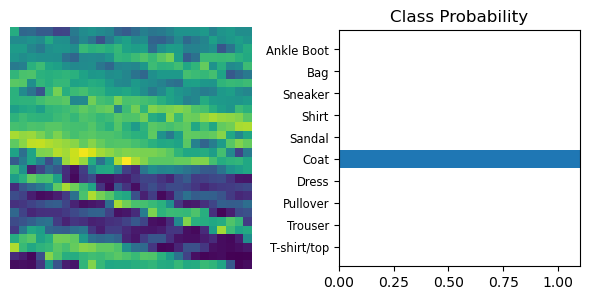

In [61]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
img = img.view(1, 3*32*32)

with torch.no_grad():
    output = model.forward(img)

ps = output
plt.imshow(images[0].permute(1,2,0))

view_classify(img, ps, version='Fashion')

In [62]:
def saliency(img, model):
    for param in model.parameters():
        param.requires_grad = False

    model.eval()
    input = img
    input.unsqueeze_(0)

    input.requires_grad = True
    preds = model(input)
    score, indices = torch.max(preds, 1)
    score.backward()
    
    slc, _ = torch.max(torch.abs(input.grad[0]), dim=0)

    plt.imshow(np.transpose(input[0].detach().numpy(), (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.subplot(1, 2, 2)
    plt.imshow(slc.numpy(), cmap=plt.cm.hot)
    plt.xticks([])
    plt.yticks([])
    return slc

/var/folders/gr/xjghdd8n51g5lh9cpmghk3p00000gn/T/ipykernel_86446/1900074174.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  saliency(torch.tensor(images[0]),model);
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


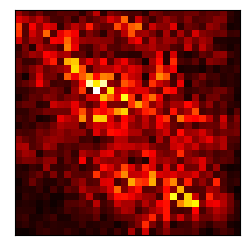

In [63]:
saliency(torch.tensor(images[0]),model);

## 3. Загрузка изображений из внешних источников

### 3.1 Решить задачу классификации обезьян (датасет [monkey.zip](https://disk.yandex.ru/d/OxYgY4S7aR6ulQ)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 60%

In [68]:
categories = { 
    "mantled_howler":0,
    "patas_monkey":1,
    "bald_uakari":2,
    "japanese_macaque":3,
    "pygmy_marmoset":4,
    "white_headed_capuchin":5,
    "silvery_marmoset":6,
    "common_squirrel_monkey":7,
    "black_headed_night_monkey":8,
    "nilgiri_langur":9
}

In [69]:
TRAIN_DIR = './data/monkeys/training/training/'                           
VAL_DIR = './data/monkeys/validation/validation/'                             

In [70]:
train_tfms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((100, 100)),
    torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

valid_tfms = torchvision.transforms.Compose([
    torchvision.transforms.Resize((100, 100)),
    torchvision.transforms.ToTensor(), torchvision.transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [71]:
monkeys_train = torchvision.datasets.ImageFolder(TRAIN_DIR, transform=train_tfms)
monkeys_test = torchvision.datasets.ImageFolder(VAL_DIR, transform=valid_tfms)

In [72]:
monkeys_train_dl = torch.utils.data.DataLoader(monkeys_train, 16, shuffle=True, 
                          num_workers=4, pin_memory=True)
monkeys_test_dl = torch.utils.data.DataLoader(monkeys_test, 16,
                        num_workers=4, pin_memory=True)

In [73]:
import torch.nn as nn

class MonkeyModel(nn.Module):
    def __init__(self):
        super(MonkeyModel, self).__init__()
        self.layer1 = nn.Sequential(nn.Conv2d(3, 32, kernel_size=5, stride=1, padding = 1), 
        nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer2 = nn.Sequential(nn.Conv2d(32, 64, kernel_size=5, stride=1, padding = 1), 
        nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.layer3 = nn.Sequential( nn.Conv2d(64, 128, kernel_size=5, stride=1, padding = 1),
        nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2))
        self.drop_out = nn.Dropout()
        self.fc1 = nn.Linear(12800, 1000)
        self.fc2 = nn.Linear(1000, 10)
        
    def forward(self, x):
        out = self.layer1(x) 
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1)
        out = self.drop_out(out)
        out = self.fc1(out)
        out = self.fc2(out)
        return out

In [74]:
model = MonkeyModel()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-4)

In [75]:
num_epochs = 20
test_loss_history = []
test_accuracy_history = []

for epoch in range(num_epochs):
    print('Epoch - ', epoch)
    for i, (images, labels) in enumerate(monkeys_train_dl):
        optimizer.zero_grad()
        
        preds = model.forward(images) 
        
        loss_value = criterion(preds, labels)
        loss_value.backward()
        
        optimizer.step()
    
    accuracy = 0
    size = 0
    for i, (images, labels) in enumerate(monkeys_test_dl):
        test_preds = model.forward(images)
        test_loss_history.append(criterion(test_preds, labels))

        accuracy += (test_preds.argmax(dim=1) == labels).float().sum()
        size += len(images)
    test_accuracy_history.append(accuracy/size)
    print(accuracy/size)

Epoch -  0
tensor(0.3713)
Epoch -  1
tensor(0.4375)
Epoch -  2
tensor(0.5221)
Epoch -  3
tensor(0.6140)
Epoch -  4
tensor(0.5809)
Epoch -  5
tensor(0.5993)
Epoch -  6
tensor(0.6176)
Epoch -  7
tensor(0.6176)
Epoch -  8
tensor(0.6287)
Epoch -  9
tensor(0.6029)
Epoch -  10
tensor(0.6140)
Epoch -  11
tensor(0.6287)
Epoch -  12
tensor(0.6471)
Epoch -  13
tensor(0.6324)
Epoch -  14
tensor(0.6250)
Epoch -  15
tensor(0.6213)
Epoch -  16
tensor(0.6324)
Epoch -  17
tensor(0.6691)
Epoch -  18
tensor(0.6544)
Epoch -  19
tensor(0.6471)


In [76]:
torch.save(model.state_dict(), '3_1.pth')

### 3.2 Решить задачу классификации собак и кошек (датасет [cats_dogs.zip](https://disk.yandex.ru/d/wQtt5O1JF9ctnA)).
* Загрузить архив с данными на диск
* Создать датасет на основе файлов при помощи `torchvision.datasets.ImageFolder`
* Преобразовать изображения к тензорами одного размера (например, 400х400). Потестировать другие преобразования из `torchvision.transforms`
* Предложить архитектуру модели для решения задачи. Обучить модель.
* Используя тестовое множество

  * Продемонстрировать работу модели: вывести несколько изображений, указать над ними правильный класс и класс, предсказанный моделью. 

  * Вывести матрицу ошибок.

  * Вывести значение accuracy на тестовом множестве.
  * Добиться значения accuracy на тестовом множестве не менее 80%

In [77]:
from  torchvision import transforms
transform = torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize([64, 64]),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
]
)


trainset = datasets.ImageFolder('./data/cats_dogs/train/', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = datasets.ImageFolder('./data/cats_dogs/train/', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True)

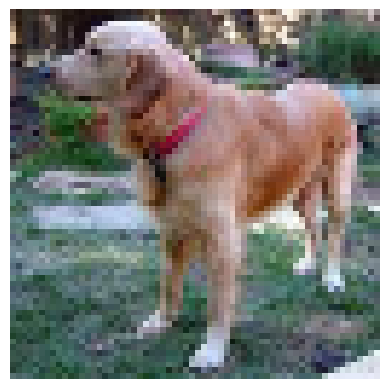

In [78]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [79]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        model = models.resnet18(pretrained=False)
        model.fc = nn.Linear(512, 2)
        self.model = model
    
    def forward(self, data):
        return self.model(data)

In [80]:
model = Classifier()
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.003)

In [81]:
from tqdm import tqdm 

In [82]:
epochs = 4
train_losses, test_losses = [], []
torch.set_grad_enabled(True)  

for e in range(epochs):
    running_loss = 0
    pbar = tqdm(trainloader)
    for images, labels in pbar:
        optimizer.zero_grad()
        logps = model(images)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        
        with torch.no_grad():
            for test_images, test_labels in testloader:
                logps = model(test_images)
                test_loss += criterion(logps, test_labels)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class.cpu().detach() == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(train_losses[-1]),
              "Test loss: {:.3f}..".format(test_losses[-1]),
              "Test Accuracy: {:.3f}%".format(accuracy/len(testloader)))

100%|█████████████████████████████████████████| 196/196 [06:29<00:00,  1.98s/it]


Epoch 1/4.. Training loss: 0.618.. Test loss: 0.510.. Test Accuracy: 0.749%


100%|█████████████████████████████████████████| 196/196 [06:30<00:00,  1.99s/it]


Epoch 2/4.. Training loss: 0.477.. Test loss: 0.423.. Test Accuracy: 0.804%


100%|█████████████████████████████████████████| 196/196 [06:37<00:00,  2.03s/it]


Epoch 3/4.. Training loss: 0.388.. Test loss: 0.313.. Test Accuracy: 0.861%


100%|█████████████████████████████████████████| 196/196 [06:48<00:00,  2.09s/it]


Epoch 4/4.. Training loss: 0.322.. Test loss: 0.279.. Test Accuracy: 0.880%


In [83]:
test_loss = 0
accuracy = 0
predict = []
true_label = []

with torch.no_grad():
    for test_images, test_labels in testloader:
        logps = model(test_images)
        test_loss += criterion(logps, test_labels)
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class.cpu().detach() == test_labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        predict.append(top_class.cpu().detach())
        true_label.append(test_labels.view(*top_class.shape))

torch.vstack(predict).flatten().shape,torch.vstack(true_label).flatten().shape

(torch.Size([25000]), torch.Size([25000]))

In [84]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(torch.vstack(true_label).flatten().numpy(), torch.vstack(predict).flatten().numpy())
print(conf_mat)


[[11250  1250]
 [ 1792 10708]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('predict', tensor(1), 'true', tensor(1))

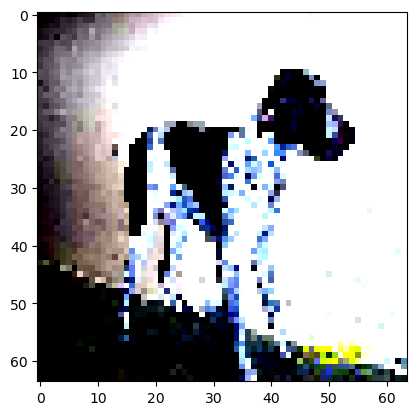

In [85]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

with torch.no_grad():
    output = model.forward(img.unsqueeze(0))

ps = output
plt.imshow(images[0].permute(1,2,0))

"predict",ps.argmax(),"true",labels[0]


Text(0.5, 23.52222222222222, 'Predicted label')

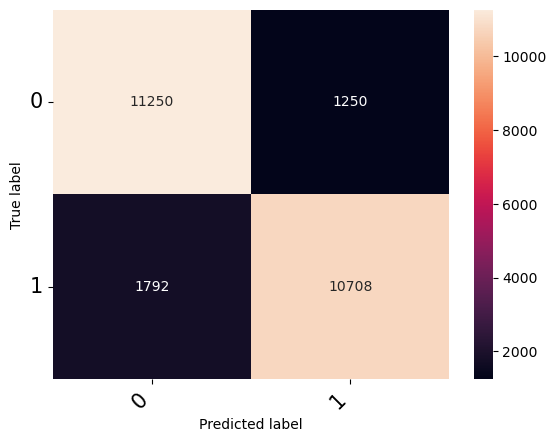

In [86]:
class_names =   list(range(2))
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [87]:
torch.save(model.state_dict(), '3_2.pth')

# 4. Transfer Learning

### 4.1 Решить задачу 3.1, воспользовавшись предобученной моделью VGG16
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель (не замораживать веса). Вычислить значение accuracy на тестовом множестве
* Дообучить модель (заморозить все веса, кроме последнего блока слоев (`classifier`)). 
* Вычислить значение accuracy на тестовом множестве.


In [88]:
from  torchvision import transforms
transform = torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize([244, 244]),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
]
)

TRAIN_DIR = './data/monkeys/training/training/'                           
VAL_DIR = './data/monkeys/validation/validation/'   

trainset = datasets.ImageFolder(TRAIN_DIR, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=100, shuffle=True)

testset = datasets.ImageFolder(VAL_DIR, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=100, shuffle=True)

In [89]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        model = models.vgg16(pretrained=True).requires_grad_(False)
        for param in model.features.parameters():
            param.require_grad = False
        num_features = model.classifier[6].in_features
        
        features = list(model.classifier.children())[:-1] 
        
        features.extend([nn.Linear(num_features, 10)]) 
        
        model.classifier = nn.Sequential(*features)
        self.model = model
    
    def forward(self, data):

        return self.model(data)

In [90]:
model = Classifier()
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

/Users/demg/conda_env/env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/Users/demg/conda_env/env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [91]:
from tqdm import tqdm 

In [92]:
epochs = 4
train_losses, test_losses = [], []
torch.set_grad_enabled(True)  

for e in range(epochs):
    running_loss = 0
    pbar = tqdm(trainloader)
    for images, labels in pbar:
        optimizer.zero_grad()

        logps = model(images)

        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for test_images, test_labels in testloader:
                logps = model(test_images)
                test_loss += criterion(logps, test_labels)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class.cpu().detach() == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(train_losses[-1]),
              "Test loss: {:.3f}..".format(test_losses[-1]),
              "Test Accuracy: {:.3f}%".format(accuracy/len(testloader)))


100%|███████████████████████████████████████████| 11/11 [06:22<00:00, 34.75s/it]


Epoch 1/4.. Training loss: 0.981.. Test loss: 0.272.. Test Accuracy: 0.942%


100%|████████████████████████████████████████| 11/11 [1:02:08<00:00, 338.95s/it]


Epoch 2/4.. Training loss: 0.147.. Test loss: 0.142.. Test Accuracy: 0.953%


100%|███████████████████████████████████████████| 11/11 [06:16<00:00, 34.20s/it]


Epoch 3/4.. Training loss: 0.071.. Test loss: 0.108.. Test Accuracy: 0.966%


100%|███████████████████████████████████████████| 11/11 [06:15<00:00, 34.12s/it]


Epoch 4/4.. Training loss: 0.050.. Test loss: 0.079.. Test Accuracy: 0.985%


In [93]:
test_loss = 0
accuracy = 0
predict = []
true_label = []

with torch.no_grad():
    for test_images, test_labels in testloader:
        logps = model(test_images)
        test_loss += criterion(logps, test_labels)
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class.cpu().detach() == test_labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        predict.append(top_class.cpu().detach())
        true_label.append(test_labels.view(*top_class.shape))

torch.vstack(predict).flatten().shape,torch.vstack(true_label).flatten().shape

(torch.Size([272]), torch.Size([272]))

In [94]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(torch.vstack(true_label).flatten().numpy(), torch.vstack(predict).flatten().numpy())
print(conf_mat)

[[25  0  0  0  0  0  0  0  0  1]
 [ 0 27  0  0  0  0  0  0  0  1]
 [ 0  0 26  0  1  0  0  0  0  0]
 [ 0  0  0 28  0  0  2  0  0  0]
 [ 0  0  0  0 25  0  1  0  0  0]
 [ 0  0  0  1  0 25  1  0  0  1]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  0  0  0  0 28  0  0]
 [ 0  0  0  0  0  0  0  1 26  0]
 [ 1  0  1  0  0  0  0  0  0 24]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


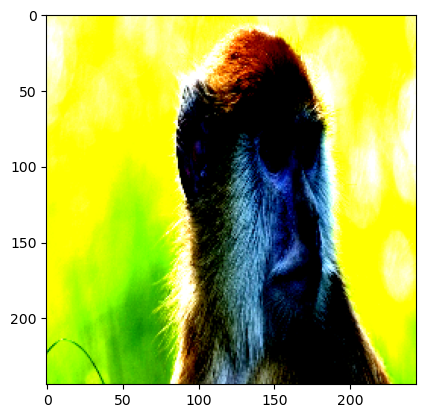

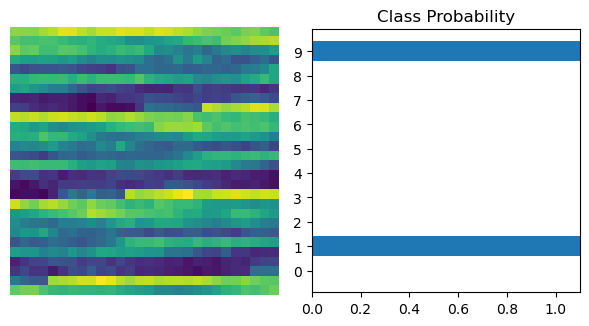

In [95]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

with torch.no_grad():
    output = model.forward(img.unsqueeze(0))

ps = output
plt.imshow(images[0].permute(1,2,0))

view_classify(img, ps.cpu().detach(), )

Text(0.5, 23.52222222222222, 'Predicted label')

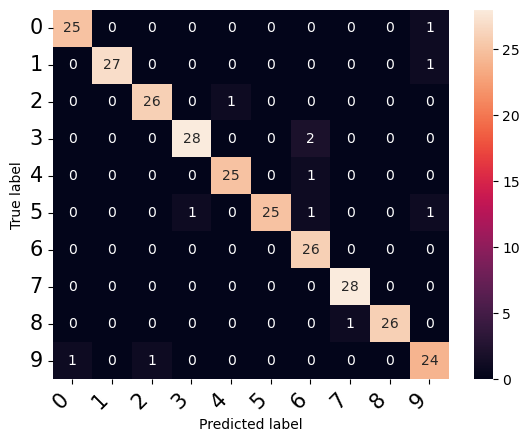

In [96]:
class_names =   list(range(10))
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')


In [97]:
torch.save(model.state_dict(), '4_1.pth')

### 4.2 Решить задачу 3.2, воспользовавшись подходящей предобученной моделью
* Не использовать VGG16 (вместо нее можно взять resnet18 или другую)
* Загрузить данные для обучения
* Преобразования: размер 224x224, нормализация с параметрами `mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225)`
* Заменить последний полносвязный слой модели в соответствии с задачей
* Дообучить модель. 
* Вычислить значение accuracy на тестовом множестве (добиться значения не меньше 97-98%)

In [107]:
import torchvision

In [108]:
from  torchvision import transforms
transform = torchvision.transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize([244, 244]),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
]
)

trainset = datasets.ImageFolder('./data/cats_dogs/train/', transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128, shuffle=True)

testset = datasets.ImageFolder('./data/cats_dogs/train/', transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=True)

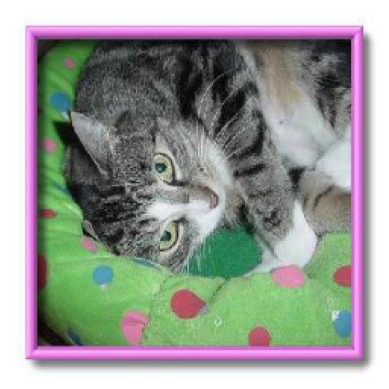

In [109]:
image, label = next(iter(trainloader))
imshow(image[0,:]);

In [110]:
class Classifier(torch.nn.Module):
    def __init__(self):
        super().__init__()
        model = models.resnet18(pretrained=True)
        model.fc = nn.Linear(512, 2)
        self.model = model
    
    def forward(self, data):

        return self.model(data)

In [111]:
model = Classifier()
criterion = nn.CrossEntropyLoss()

optimizer = optim.Adam(model.parameters(), lr=0.001)

In [112]:
from tqdm import tqdm 

In [113]:
epochs = 4
train_losses, test_losses = [], []
torch.set_grad_enabled(True)  

for e in range(epochs):
    running_loss = 0
    pbar = tqdm(trainloader)
    for images, labels in pbar:
        optimizer.zero_grad()

        logps = model(images)

        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        test_loss = 0
        accuracy = 0
        with torch.no_grad():
            for test_images, test_labels in testloader:
                logps = model(test_images)
                test_loss += criterion(logps, test_labels)
                ps = torch.exp(logps)
                top_p, top_class = ps.topk(1, dim=1)
                equals = top_class.cpu().detach() == test_labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(test_loss/len(testloader))
        
        print("Epoch {}/{}..".format(e+1, epochs),
              "Training loss: {:.3f}..".format(train_losses[-1]),
              "Test loss: {:.3f}..".format(test_losses[-1]),
              "Test Accuracy: {:.3f}%".format(accuracy/len(testloader)))


100%|█████████████████████████████████████████| 196/196 [46:04<00:00, 14.11s/it]


Epoch 1/4.. Training loss: 0.105.. Test loss: 0.061.. Test Accuracy: 0.978%


100%|█████████████████████████████████████████| 196/196 [47:39<00:00, 14.59s/it]


Epoch 2/4.. Training loss: 0.062.. Test loss: 0.048.. Test Accuracy: 0.983%


100%|█████████████████████████████████████████| 196/196 [47:17<00:00, 14.48s/it]


Epoch 3/4.. Training loss: 0.049.. Test loss: 0.028.. Test Accuracy: 0.990%


100%|███████████████████████████████████████| 196/196 [2:54:07<00:00, 53.30s/it]


Epoch 4/4.. Training loss: 0.036.. Test loss: 0.039.. Test Accuracy: 0.986%


In [114]:
test_loss = 0
accuracy = 0
predict = []
true_label = []

with torch.no_grad():
    for test_images, test_labels in testloader:
        logps = model(test_images)
        test_loss += criterion(logps, test_labels)
        ps = torch.exp(logps)
        top_p, top_class = ps.topk(1, dim=1)
        equals = top_class.cpu().detach() == test_labels.view(*top_class.shape)
        accuracy += torch.mean(equals.type(torch.FloatTensor))
        predict.append(top_class.cpu().detach())
        true_label.append(test_labels.view(*top_class.shape))

torch.vstack(predict).flatten().shape,torch.vstack(true_label).flatten().shape

(torch.Size([25000]), torch.Size([25000]))

In [115]:
from sklearn.metrics import confusion_matrix
conf_mat=confusion_matrix(torch.vstack(true_label).flatten().numpy(), torch.vstack(predict).flatten().numpy())
print(conf_mat)


[[12277   223]
 [  136 12364]]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


('predict', tensor(0), 'true', tensor(0))

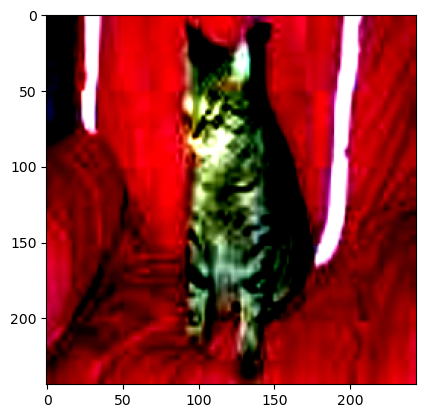

In [116]:
model.eval()

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]

with torch.no_grad():
    output = model.forward(img.unsqueeze(0))

ps = output
plt.imshow(images[0].permute(1,2,0))

"predict",ps.argmax(),"true",labels[0]


Text(0.5, 23.52222222222222, 'Predicted label')

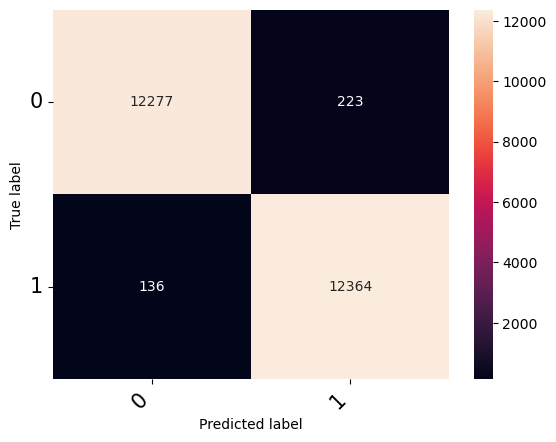

In [117]:
class_names = list(range(2))
df_cm = pd.DataFrame(conf_mat, index=class_names, columns=class_names).astype(int)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
